
# DATA ANALYSIS WITH PYTHON 

Netflix TV Shows and Movies dataset


<span style="color:green;">For this project, we are going to use a dataset of all the movies and Tv shows that are available on netflix. This data was acquired in May 2022 containing data available in the United States. This dataset is in .csv format titled (titles.csv).By analyzing these dataset, we will try to understand which type of movies and shows does netflix offers, which year had the most movies releases, which genre has maximum movies or shows, and average run time of a movie and their corresponding imdb ratings.
Using Machine Learning, we try to predict the IMDB rating for movies or Tv shows.

<b>Dataset source - https://www.kaggle.com/datasets/victorsoeiro/netflix-tv-shows-and-movies

This dataset contains +5k unique titles on Netflix with 15 columns containing their information, including:
<ul>
<li>id: The title ID on JustWatch
<li>title: The name of the title
<li>show_type: TV show or movie
<li>description: A brief description
<li>release_year: The release year
<li>age_certification: The age certification
<li>runtime: The length of the episode (SHOW) or movie
<li>genres: A list of genres
<li>production_countries: A list of countries that produced the title
<li>seasons: Number of seasons if it's a SHOW
<li>imdb_id: The title ID on IMDB
<li>imdb_score: Score on IMDB
<li>imdb_votes: Votes on IMDB
<li>tmdb_popularity: Popularity on TMDB
<li>tmdb_score: Score on TMDB
</ul>

In [76]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn as sk
import sklearn.tree as tree
from IPython.display import Image  
import plotly 
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

### Loading the data:

In [77]:
df = pd.read_csv('titles.csv')
df.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600


### Data Description:

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5850 entries, 0 to 5849
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5850 non-null   object 
 1   title                 5849 non-null   object 
 2   type                  5850 non-null   object 
 3   description           5832 non-null   object 
 4   release_year          5850 non-null   int64  
 5   age_certification     3231 non-null   object 
 6   runtime               5850 non-null   int64  
 7   genres                5850 non-null   object 
 8   production_countries  5850 non-null   object 
 9   seasons               2106 non-null   float64
 10  imdb_id               5447 non-null   object 
 11  imdb_score            5368 non-null   float64
 12  imdb_votes            5352 non-null   float64
 13  tmdb_popularity       5759 non-null   float64
 14  tmdb_score            5539 non-null   float64
dtypes: float64(5), int64(

In [79]:
df.describe(include='all')

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,5850,5849,5850,5832,5850.000000,3231,5850.000000,5850,5850,2106.000000,5447,5368.000000,5.352000e+03,5759.000000,5539.000000
unique,5850,5798,2,5829,NaN,11,NaN,1726,452,NaN,5447,NaN,NaN,NaN,NaN
top,ts300399,The Gift,MOVIE,Five families struggle with the ups and downs ...,NaN,TV-MA,NaN,['comedy'],['US'],NaN,tt0075314,NaN,NaN,NaN,NaN
freq,1,3,3744,2,NaN,883,NaN,484,1959,NaN,1,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,2016.417094,NaN,76.888889,NaN,NaN,2.162868,NaN,6.510861,2.343938e+04,22.637925,6.829175
std,NaN,NaN,NaN,NaN,6.937726,NaN,39.002509,NaN,NaN,2.689041,NaN,1.163826,9.582047e+04,81.680263,1.170391
min,NaN,NaN,NaN,NaN,1945.000000,NaN,0.000000,NaN,NaN,1.000000,NaN,1.500000,5.000000e+00,0.009442,0.500000
25%,NaN,NaN,NaN,NaN,2016.000000,NaN,44.000000,NaN,NaN,1.000000,NaN,5.800000,5.167500e+02,2.728500,6.100000
50%,NaN,NaN,NaN,NaN,2018.000000,NaN,83.000000,NaN,NaN,1.000000,NaN,6.600000,2.233500e+03,6.821000,6.900000
75%,NaN,NaN,NaN,NaN,2020.000000,NaN,104.000000,NaN,NaN,2.000000,NaN,7.300000,9.494000e+03,16.590000,7.537500


In [80]:
len(df)

5850

In [81]:
df.isnull().sum()

id                         0
title                      1
type                       0
description               18
release_year               0
age_certification       2619
runtime                    0
genres                     0
production_countries       0
seasons                 3744
imdb_id                  403
imdb_score               482
imdb_votes               498
tmdb_popularity           91
tmdb_score               311
dtype: int64

Overall there are <b>5850</b> entries of Movies and TV shows combined in the data.\
There is one row with missing title and 18 with missing description.\ 
We could remove these rows since they are considerably less than the total row count.\
When the type = MOVIE, the seasons value is missing. We can replace it with 0.\
For the TV shows and Movies with missing age_certification values, we can replac the NaN with 'data unavailable'.\
We can remove the tmdb_popularity and tmdb_score columns as we are just using imdb scores to do the machine learning and we do not want the tmdb values to influence our output for imdb scores.

In [82]:
df.shape

(5850, 15)

<b>The dataset has 5850 rows and 15 columns</b>

In [83]:
df.isna().sum().sum()

8167

In [84]:
df.duplicated().any()

False

### Data Cleaning:

In [85]:
len(df)/2

2925.0

<b>Step 1. Dropping the rows with missing values in title and description column</b>

In [86]:
df.dropna(subset=['title','description'],inplace=True)

<b>Step 2. Dropping the rows with missing imdb values</b>

In [87]:
df.dropna(subset=['imdb_score','imdb_votes'],inplace=True)

In [88]:
df['age_certification'] = df['age_certification'].replace(np.nan, 'data unavailable')

In [89]:
len(df[(df.type == 'MOVIE') & (df.seasons.notnull())])

0

In [90]:
len(df[df.type == 'MOVIE'])

3410

There are no values in table where seasons value is other than null when type = 'MOVIE'

<b>Assigning seasons = 0 when type ='MOVIE'</b>

In [91]:
# Assigning seasons = 0 when type ='MOVIE'

df.seasons[df.type == 'MOVIE'] = 0

<b>Step 3. Dropping the columns 'tmdb_popularity' and 'tmdb_score'</b>

In [92]:
df.drop(columns=['tmdb_popularity', 'tmdb_score'], inplace=True)
df.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],0.0,tt0075314,8.2,808582.0
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],0.0,tt0068473,7.7,107673.0
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],0.0,tt0071853,8.2,534486.0
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,data unavailable,150,"['war', 'action']","['GB', 'US']",0.0,tt0061578,7.7,72662.0
5,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,"['comedy', 'european']",['GB'],4.0,tt0063929,8.8,73424.0


In [93]:
df.isnull().sum()

id                      0
title                   0
type                    0
description             0
release_year            0
age_certification       0
runtime                 0
genres                  0
production_countries    0
seasons                 0
imdb_id                 0
imdb_score              0
imdb_votes              0
dtype: int64

<b>Step 4. Creating dummy variables for Genre column</b>

In [94]:
dummy_genres = df['genres'].str.strip('[]').str.replace("'", "").str.get_dummies(', ')
dummy_genres

,action,animation,comedy,crime,documentation,drama,european,family,fantasy,history,horror,music,reality,romance,scifi,sport,thriller,war,western
1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0
3,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5843,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
5845,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
5846,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
5847,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<b>Step 5. Adding these dummy variables to the DataFrame</b>

In [95]:
df = pd.concat([df, dummy_genres], axis=1)
df

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,...,history,horror,music,reality,romance,scifi,sport,thriller,war,western
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],0.0,...,0,0,0,0,0,0,0,0,0,0
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],0.0,...,0,0,0,0,0,0,0,1,0,0
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],0.0,...,0,0,0,0,0,0,0,0,0,0
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,data unavailable,150,"['war', 'action']","['GB', 'US']",0.0,...,0,0,0,0,0,0,0,0,1,0
5,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,"['comedy', 'european']",['GB'],4.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5843,tm1097142,My Bride,MOVIE,The story follows a young man and woman who go...,2021,data unavailable,93,"['romance', 'comedy', 'drama']",['EG'],0.0,...,0,0,0,0,1,0,0,0,0,0
5845,tm1014599,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,data unavailable,100,"['romance', 'drama']",['NG'],0.0,...,0,0,0,0,1,0,0,0,0,0
5846,tm898842,C/O Kaadhal,MOVIE,A heart warming film that explores the concept...,2021,data unavailable,134,['drama'],[],0.0,...,0,0,0,0,0,0,0,0,0,0
5847,tm1059008,Lokillo,MOVIE,A controversial TV host and comedian who has b...,2021,data unavailable,90,['comedy'],['CO'],0.0,...,0,0,0,0,0,0,0,0,0,0


In [96]:
type_counts = df['type'].value_counts()
type_counts

MOVIE    3410
SHOW     1938
Name: type, dtype: int64

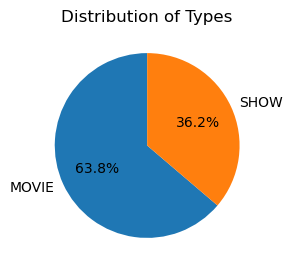

In [97]:
plt.figure(figsize=(5, 3))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Types')
plt.show()

<span style="color:blue;"><b>Over all, there are 3410 Movies and 1938 tv-Shows</b>

<b><span style="color:blue;">In data cleaning we have:</b>
<ul><b>
<span style="color:blue;"><li>removed rows with missing title,description and imdb values
<li><span style="color:blue;">dealt with null values in 'seasons' and 'age_certification' columns
<li><span style="color:blue;">dropped 'tmdb_popularity' and 'tmdb_score' columns from dataframe
<li><span style="color:blue;">created dummy variables for 'genres'
    </b></ul>

## Questions

### <b>1. In the netflix dataset, which year had the most movies released? Which genre was the most popular amongst the movies released in that year? Predict the probability of a new release of a movie or a show being rated more than 7.

<b>Step 1. Filtering rows with 'MOVIES'

In [98]:
movies_df = df[df['type'] == 'MOVIE']
movies_df

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,...,history,horror,music,reality,romance,scifi,sport,thriller,war,western
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],0.0,...,0,0,0,0,0,0,0,0,0,0
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],0.0,...,0,0,0,0,0,0,0,1,0,0
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],0.0,...,0,0,0,0,0,0,0,0,0,0
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,data unavailable,150,"['war', 'action']","['GB', 'US']",0.0,...,0,0,0,0,0,0,0,0,1,0
6,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5842,tm1066324,Super Monsters: Once Upon a Rhyme,MOVIE,The Super Monsters rethink exemplary fantasies...,2021,data unavailable,25,"['animation', 'family']",[],0.0,...,0,0,0,0,0,0,0,0,0,0
5843,tm1097142,My Bride,MOVIE,The story follows a young man and woman who go...,2021,data unavailable,93,"['romance', 'comedy', 'drama']",['EG'],0.0,...,0,0,0,0,1,0,0,0,0,0
5845,tm1014599,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,data unavailable,100,"['romance', 'drama']",['NG'],0.0,...,0,0,0,0,1,0,0,0,0,0
5846,tm898842,C/O Kaadhal,MOVIE,A heart warming film that explores the concept...,2021,data unavailable,134,['drama'],[],0.0,...,0,0,0,0,0,0,0,0,0,0


<b>Step 2. Grouping movies by release year and counting movies per year

In [99]:
movies_by_year = movies_df.groupby('release_year').size()
movies_by_year

release_year
1954      2
1956      1
1958      1
1959      1
1960      1
       ... 
2018    445
2019    462
2020    420
2021    424
2022    178
Length: 62, dtype: int64

<b>Step 3. Finding the year with the most movies released

In [100]:
year_most_movies = movies_by_year.idxmax()
year_most_movies

2019

<b>Step 4. Finding the maximum count of the movies released in a year

In [101]:
year_most_movies = movies_by_year.max()
year_most_movies

462

<b> Step 5. Plotting graph of the number of movies released per year

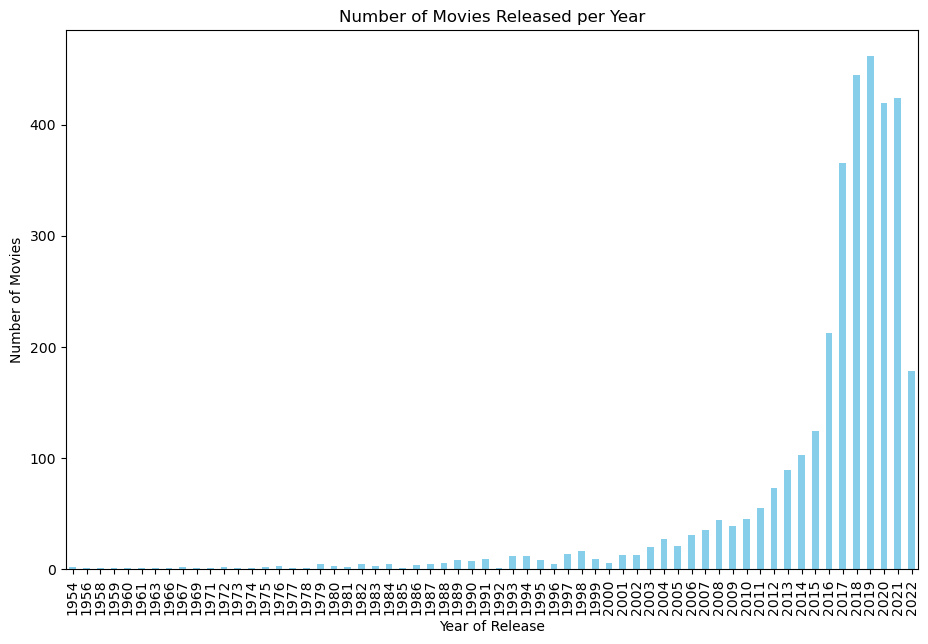

In [102]:
plt.figure(figsize=(11, 7))
movies_by_year.plot(kind='bar', color='skyblue')
plt.title('Number of Movies Released per Year')
plt.xlabel('Year of Release')
plt.ylabel('Number of Movies')
plt.show()

<b> Step 6. Creating a new data frame with only the movies released in 2019

In [103]:
movies2019=movies_df[movies_df['release_year'] == 2019]
movies2019

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,...,history,horror,music,reality,romance,scifi,sport,thriller,war,western
3045,tm441050,The Gentlemen,MOVIE,American expat Mickey Pearson has built a high...,2019,R,113,"['crime', 'action', 'comedy']","['US', 'GB']",0.0,...,0,0,0,0,0,0,0,0,0,0
3057,tm510203,A Call to Spy,MOVIE,"In the beginning of WWII, with Britain becomin...",2019,PG-13,123,"['crime', 'drama', 'thriller', 'war', 'history']",['US'],0.0,...,1,0,0,0,0,0,0,1,1,0
3076,tm244149,The Irishman,MOVIE,"Pennsylvania, 1956. Frank Sheeran, a war veter...",2019,R,209,"['crime', 'drama', 'history', 'thriller']",['US'],0.0,...,1,0,0,0,0,0,0,1,0,0
3085,tm827638,Synchronic,MOVIE,Two New Orleans paramedics' lives are ripped a...,2019,R,102,"['crime', 'drama', 'horror', 'scifi', 'thriller']",['US'],0.0,...,0,1,0,0,0,1,0,1,0,0
3089,tm824398,The Platform,MOVIE,"A mysterious place, an indescribable prison, a...",2019,data unavailable,95,"['scifi', 'thriller', 'horror', 'european']",['ES'],0.0,...,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4684,tm450129,Sakaling Maging Tayo,MOVIE,"Two college freshmen, Pol and Laya, accidental...",2019,data unavailable,90,"['romance', 'comedy']",['PH'],0.0,...,0,0,0,0,1,0,0,0,0,0
4685,tm810873,Thottappan,MOVIE,"When his partner in crime goes missing, a smal...",2019,data unavailable,140,['drama'],['IN'],0.0,...,0,0,0,0,0,0,0,0,0,0
4686,tm824566,Ibrahim: A Fate to Define,MOVIE,"In this provocative and personal documentary, ...",2019,data unavailable,75,['documentation'],"['PS', 'DK', 'LB']",0.0,...,0,0,0,0,0,0,0,0,0,0
4689,tm460199,High End Yaariyaan,MOVIE,High End Yaariyaan is a tale of 3 friends Ranj...,2019,data unavailable,140,"['romance', 'comedy', 'drama', 'family']",['IN'],0.0,...,0,0,0,0,1,0,0,0,0,0


<b> Step 7. Creating a new data frame with only the dummy variables columns from the movies released in 2019.

In [104]:
columns_needed = ['action', 'animation', 'comedy', 'crime', 'documentation',
                    'drama', 'european', 'family', 'fantasy', 'history', 'horror', 'music',
                    'reality', 'romance', 'scifi', 'sport', 'thriller', 'war', 'western']
df_movies2019= movies2019[columns_needed]
df_movies2019

,action,animation,comedy,crime,documentation,drama,european,family,fantasy,history,horror,music,reality,romance,scifi,sport,thriller,war,western
3045,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3057,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0
3076,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0
3085,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0
3089,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4684,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4685,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4686,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4689,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0


<b> Step 8. Adding the totals of all the columns and then showing the 5 largest values for the top genres.

In [105]:
top_genres=df_movies2019.sum().nlargest()
top_genres

drama            243
comedy           190
thriller          96
romance           87
documentation     74
dtype: int64

<b> Step 9. Plotting the results using the plot command.

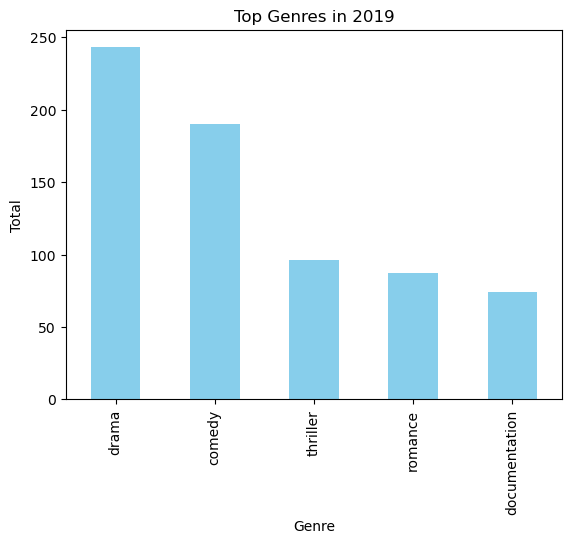

In [106]:
import matplotlib.pyplot as plt
top_genres.plot(kind='bar', color='Skyblue')
plt.title('Top Genres in 2019')
plt.xlabel('Genre')
plt.ylabel('Total')
plt.show()


<b>Step 10: Preparing data frame for machine learning

In [107]:
df_predict = pd.get_dummies(df, columns=['id','title','description','age_certification','production_countries','imdb_id','type','genres'],
        dummy_na=True)

In [108]:
df_predict.head()

,release_year,runtime,seasons,imdb_score,imdb_votes,action,animation,comedy,crime,documentation,...,"genres_['western', 'drama', 'action', 'european']","genres_['western', 'drama', 'history']","genres_['western', 'drama', 'thriller', 'action']","genres_['western', 'drama']","genres_['western', 'fantasy', 'music']","genres_['western', 'history', 'drama']","genres_['western', 'horror', 'action']","genres_['western', 'thriller', 'horror']",genres_[],genres_nan
1,1976,114,0.0,8.2,808582.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1972,109,0.0,7.7,107673.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1975,91,0.0,8.2,534486.0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1967,150,0.0,7.7,72662.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1969,30,4.0,8.8,73424.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [109]:
df_predict.isna().sum()

release_year                                0
runtime                                     0
seasons                                     0
imdb_score                                  0
imdb_votes                                  0
                                           ..
genres_['western', 'history', 'drama']      0
genres_['western', 'horror', 'action']      0
genres_['western', 'thriller', 'horror']    0
genres_[]                                   0
genres_nan                                  0
Length: 23509, dtype: int64

In [110]:
len(df_predict)

5348

In [111]:
df_predict2=df_predict[df_predict.imdb_score>7]

In [112]:
df_predict2['hit']=pd.cut(df_predict2.imdb_score, 10)

<b>Step 11:  Plotting bar chart representing the count of movies and shows that are rated more than 7 on IMDB platform.

<Axes: xlabel='count', ylabel='hit'>

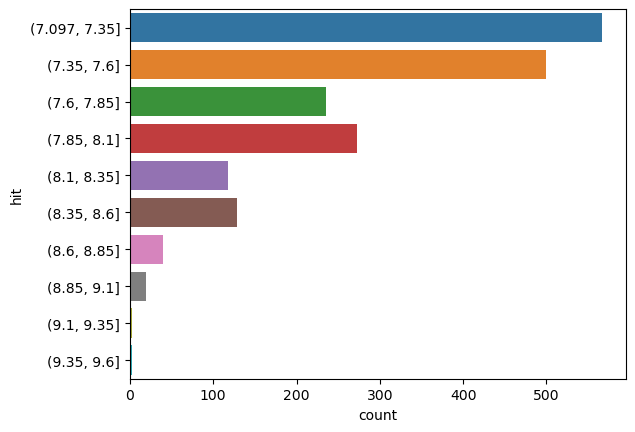

In [113]:
sns.countplot(y='hit', data=df_predict2)

<b> Step 12: Get the proportion of imdb scores more than 7 to check to see if it is a good classification problem.

In [114]:
df_predict['imdb_bin'] = (df_predict.imdb_score > 7)+0.0

In [115]:
df_predict.imdb_bin.mean()

0.35228122662677636

<b>Step 13: Defining X and Y

In [116]:
X = df_predict.drop(['imdb_bin','imdb_score'],axis=1)

In [117]:
Y = df_predict.imdb_bin

<b> Step 14: Split the data into 70% training set and 30% testing set

In [118]:
from sklearn.model_selection import train_test_split

In [119]:
train_test_split(X,Y,test_size=0.3,random_state = 0)

[      release_year  runtime  seasons  imdb_votes  action  animation  comedy  \
 674           2012       45      3.0     29366.0       0          0       1   
 2597          2018      115      0.0      2725.0       0          0       0   
 190           1998      165      0.0      7618.0       1          0       1   
 3686          2020       98      0.0      1425.0       0          0       1   
 2066          2018       17      3.0       158.0       0          1       0   
 ...            ...      ...      ...         ...     ...        ...     ...   
 5362          2022       48      0.0       319.0       0          0       0   
 3452          2020       41      1.0       560.0       0          0       0   
 1749          2017       23      6.0     16488.0       0          0       1   
 2729          2017       69      0.0      1621.0       0          0       1   
 2871          2017       60      0.0      1206.0       0          0       1   
 
       crime  documentation  drama  ..

<b> Step 15: Saving X_train, X_test, Y_train, Y_test

In [120]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state = 0)

In [121]:
(len(X_train) + len(X_test)) == len(X)

True

In [122]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
cl = RandomForestClassifier(random_state = 0)

cl.fit(X_train,Y_train)

<b> Step 16: Predicting on the testing set (X_test)

In [ ]:
cl.predict(X_test)

In [ ]:
y_pred = cl.predict(X_test)
y_pred

<b> Step 17: Get prediction outputs with probabilities of 0 and 1 using predict_proba

In [ ]:
cl.predict_proba(X_test)

<b> Step 18: Getting Confusion matrix using confusion_matrix

In [ ]:
from sklearn.metrics import confusion_matrix
import sklearn.metrics as met

In [ ]:
confusion_matrix(Y_test,y_pred)

<b><span style="color:green;"> True Positive: 963 movies and shows are correctly predicted to be rated more than 7.                                         
    True Negative: 194 movies and shows are correctly predicted to be rated 7 or less.                                         
    False Positive: 87 movies and shows are incorrectly predicted to be rated more than 7.                                     
    False Negative: 361 movies and shows are incorrectly predicted to be rated 7 or less.

<b>Step 19. Finding the Accuracy Score

In [ ]:
met.accuracy_score(Y_test, y_pred)

<b><span style="color:green;"> The accuracy is calculated as the ratio of correctly predicted instances to the total instances. This means that 72.08% of all instances were correctly classified by the model.

<b>Step 20. Finding the Precision Score

In [ ]:
met.precision_score(Y_test,y_pred)

<b><span style="color:green;">  Precision is calculated as the ratio of true positives to the sum of true positives and false positives. This means that about 69.03% of the instances predicted as positive are indeed positive. 

<b><span style="color:blue;">   Conclusion 1:  
    We can see there is downfall in release of movies after 2019 due to Pandemic. Also, maximum movie released in year 2019 belongs to Drama genre.
        This model is useful for decision makers to understand what genre or TV Shows/Movies are rated higher than 7. A higher rating means better pay off for people that are involved in film making. Investing in similar types of projects will be fruitful.

### 2. Illustrate the distribution of movies or shows produced in each country on the basis of genres. Which genre has max movies or shows. 

 <b> Step 1. Cleaning the production_countries field and filling empty with 'Unknown'and NaN with 'Missing'.

In [ ]:
df['production_countries'] = df['production_countries'].replace('[]', 'Unknown').fillna('Missing')

<b> Step 2. Defining a function, clean_production_countries, that takes a parameter countries, checks if it is a list, and if not, converts it from a string representation of a list to an actual list. It then strips leading and trailing whitespaces from each country in the list.

In [ ]:
def clean_production_countries(countries):
    if isinstance(countries, list):
        countries = [country.strip() for country in countries]
    else:
        countries = countries.strip('[]').replace("'", "")
        countries = [country.strip() for country in countries.split(',')]
    return countries

<b> Step 3. Applying the function clean_production_countries to the 'production_countries' column in a DataFrame df, modifying the values in that column by cleaning and formatting them.

In [ ]:
df['production_countries'] = df['production_countries'].apply(clean_production_countries)

<b> Step 4. Extracting and counting the occurrences of production countries from a DataFrame column, filtering out entries labeled as "Unknown" or "Missing," and then displaying the top 10 most frequently occurring production countries.

In [ ]:
top=df['production_countries'].explode().value_counts()
top[(top.index!="Unknown")& (top.index!="Missing")].nlargest(10)

<b> Step 5. Creating a new DataFrame, genres_df, by selecting specific columns related to movie genres from the original DataFrame df, and then calculating and displaying the top genres based on their total sums.

In [ ]:
selected_columns = ['action', 'animation', 'comedy', 'crime', 'documentation',
                    'drama', 'european', 'family', 'fantasy', 'history', 'horror', 'music',
                    'reality', 'romance', 'scifi', 'sport', 'thriller', 'war', 'western']
genres_df = df[selected_columns]
genres_df.sum().nlargest()

<b>Step 6. Finding the top countries from the previous result and the top genres from the previous result.

In [ ]:
top_countries = top[(top.index != "Unknown") & (top.index != "Missing")].nlargest(10).index
top_genres = genres_df.sum().nlargest(5).index

<b>Step 7. Exploding the DataFrame to separate rows for each country.

In [ ]:
exploded_df = df.explode('production_countries')

<b>Step 8. Filtering the DataFrame based on the dynamically obtained top countries and genres and then using Group by 'production_countries' and sum the counts for dynamically obtained top genres and then print the result.

In [ ]:
filtered_exploded_df_dynamic = exploded_df[exploded_df['production_countries'].isin(top_countries)]
result_df_dynamic = filtered_exploded_df_dynamic.groupby('production_countries')[top_genres].sum()
print(result_df_dynamic)

<b>Step 9. Plotting a stacked bar plot illustrating the distribution of the most-watched genres in different countries on Netflix.

In [ ]:
result_df_dynamic.plot(kind='bar', stacked=True, figsize=(10, 6))

<b><span style="color:blue;"> Conclusion 2:  
    Drama is the most popular genre for Netflix in the US and India, the platform's top content-producing countries. This insight is crucial for Netflix as it allows them to tailor content to local audience preferences, strategically allocate resources, and enhance global expansion efforts by adapting their library to diverse cultural tastes. In essence, understanding and catering to varied audience preferences contribute to Netflix's competitiveness and success in the streaming industry.

### 3. What is the average runtime of a movie or a show. Also, calculating the total runtime for all the movies and shows.
### For management decision: check the run time for idmb score more than 8.0. Management can use this info to suggest the average movie time to get good imdb score.

<b> Step 1. Filtering rows with 'MOVIES' and 'SHOWS'

In [ ]:
shows= df[df.type=="SHOW"]
movies= df[df.type=="MOVIE"]

In [ ]:
import statistics

<b> Step 2. Calculating total and average runtime for movies and shows 

In [ ]:
shows_runtime_max= max(shows.runtime)
shows_runtime_min= min(shows[shows.runtime >0].runtime) #ignoring 0 runtime as minimum as it may be due to some error.

movies_runtime_max= max(movies.runtime)
movies_runtime_min= min(movies[movies.runtime >0].runtime)

shows_avg= statistics.mean(shows.runtime)
movies_avg= statistics.mean(movies.runtime)

print(f"The average duration for a show on netflix is {int(shows_avg)} minutes, \nThe maximum duration is {shows_runtime_max} minutes and, \nThe minimum duration is {shows_runtime_min} minutes.")
print("\n")
print(f"The average duration for a movie on netflix is {int(movies_avg)} minutes, \nThe maximum duration is {movies_runtime_max} minutes and, \nThe minimum duration is {movies_runtime_min} minutes.")

<b> Step 3. Getting all the movies together with IMDB score greater than 7 

In [ ]:
movies_imb_gt_7 =  movies [movies.imdb_score > 7] 

<b> Step 4. Calculating the mean runtime for movies greater than 7 IMDB score



In [ ]:
mean_runtime = movies_imb_gt_7['runtime'].mean()
mean_runtime

<b> Step 5. Plotting a scatter chart plotting a correlation runtime and imdb score for "MOVIES"

In [ ]:
fig = px.scatter(data_frame= movies_imb_gt_7, x="imdb_score", y="runtime")
fig.update_layout(autosize=False, width=800, height=600,)
fig.show()

<b><span style="color:green;"> On the basis of above graph we can conclude that most movies that the ideal runtime for a show is between 80-120 minutes
for IMDB score greater than 7. 

<b> Step 6. Finding all the shows together with IMDB score greater than 7

In [ ]:
shows_imb_gt_7 =  shows [shows.imdb_score > 7] 

<b> Step 7. Finding the mean runtime for shows greater than 7 IMDB score

In [ ]:
mean_runtime = shows_imb_gt_7 ['runtime'].mean()
mean_runtime

<b><span style="color:green;"> Shows with an IMDB score greater than 7 on Netflix have an average runtime of 42.4822 minutes.

<b> Step 8. Plotting a scatter chart showing correlation between runtime and imdb score for "SHOWS"

In [ ]:
fig = px.scatter(data_frame=shows_imb_gt_7, x="imdb_score", y="runtime")
fig.update_layout(autosize=False, width=800, height=600,)
fig.show()

<b><span style="color:green;"> On the basis of above graph we can conclude that most movies that the ideal runtime for a show is between 25-60 minutes 
for IMDB score greater than 7. 

<b> Step 9. Calculating the correlation between Runtime and IMDB score for Movies

In [ ]:
correlation_movies = movies_imb_gt_7['runtime'].corr(movies_imb_gt_7['imdb_score'])
correlation_movies


<b> Step 10. Calculating the correlation between Runtime and IMDB score for Shows

In [ ]:
correlation = shows_imb_gt_7['runtime'].corr(shows_imb_gt_7['imdb_score'])
correlation

<b><span style="color:blue;">Conclusion 3:  
    <b><span style="color:blue;">    0.15 explains a  "weak positive correlation" between runtime and IMDB score for movies. This means 
there is a very weak positive relationship between runtime and IMDB score close to 0, which indicates and there
are many other factors that influence IMDB score besides runtime.  
        
    
<b><span style="color:blue;">    0.038 explains a  "very weak positive correlation" between runtime and IMDB score for movies. This means that there is a very slight tendency for shows with longer runtimes to have higher IMDB scores, but this relationship is very weak and may not be statistically significant, therefore there are many other factors that influence IMDB score besides runtime.  
  


### Limitations:

<ul>
<li>Our dataset only accounts for movies and tv shows released till May 2022. It does not have the very latest releases.
<li>Our dataset does not explain the socio-political causes that might have influenced the ratings of the movie.
        For eg. A movie released about a politician or on religions will be perceived differently in different part of the world. And the ratings for such movies might not have anything to do with the cast, description, runtime or genres it belongs to. Our dataset fails to capture this emotion.
<li>The ratings of the movie may also be influenced by other movies released simultaneously but not streamed on Netflix.
<li> There are missing values in several columns, such as "age_certification," "seasons," and "tmdb_score." Incomplete information can limit the accuracy of our analysis.

### Summary:

<ul>
<li>The datset contents 3410 Movies and 1938 tv-Shows with 2019 being the year when most movies were released.
<li>The highest amount of movies produced were in Drama genre, US and India being the top contenders for production. However, the most movies produced in the US fall under Comedy genre.
This means comedy is preferred in US unlike rest of the world.
<li>The correlation of 0.15 suggests a slight connection between longer movie runtimes and higher IMDB scores, but it's a weak link, indicating that many other factors also play a role in determining scores. 